In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-data/Amazon Sales data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/amazon-sales-data/Amazon Sales data.csv')



In [4]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [5]:
#checking the shape
df.shape

(100, 14)

observation :we have a total of 100 rows and 14 columns.

In [6]:
# columns name

In [7]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [9]:
# checking for any missed values
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

there is no missing value in the dataset.

In [10]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [11]:
df['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [12]:
#convert order date into datetime
df["Order Date"]= pd.to_datetime(df["Order Date"])

In [13]:
#extract year and month from order date
df["Year"]= df["Order Date"].dt.year
df["Month"]=df["Order Date"].dt.month
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [14]:
#calculating the no of regions
regions=df["Region"].nunique()
print("number of Regions:", regions)

number of Regions: 7


OBSERVATION: there are 7 different regions in our dataset.

In [15]:
#Calculating the number of countries
country=df["Country"].nunique()
print("Number of Countries:",country)

Number of Countries: 76


There are 76 different countries in our dataset.

In [16]:
# calculating the item type
item_type = df["Item Type"].nunique()
print("Number of Item Types",item_type)

Number of Item Types 12


There are 12 different types of items in our dataset.

In [17]:
#calculating the total units sold
units_sold = df["Units Sold"].sum()
print("Total Units Sold:",units_sold)

Total Units Sold: 512871


In [18]:
#Calculating the total unit cost
unit_cost=df["Unit Cost"].sum()
print("Total Unit Cost:",unit_cost)

Total Unit Cost: 19104.8


In [19]:
#Calculating the total revenue
total_revenue=df["Total Revenue"].sum()
print("Total Revenue:",total_revenue)

Total Revenue: 137348768.31


In [20]:
#Calculating the total cost
total_cost=df["Total Cost"].sum()
print("Total Cost:",total_cost)

Total Cost: 93180569.91000001


In [21]:
#Calculating the total profit
total_profit=df["Total Profit"].sum()
print("total profit:",total_profit)

total profit: 44168198.39999999


In [22]:
df.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

So 'Asia','Central America and the Caribbean','Europe' and 'Sub Saharan Africa' are having huge profits in offline and others are having more profits is online.

Text(0, 0.5, 'Total revenue')

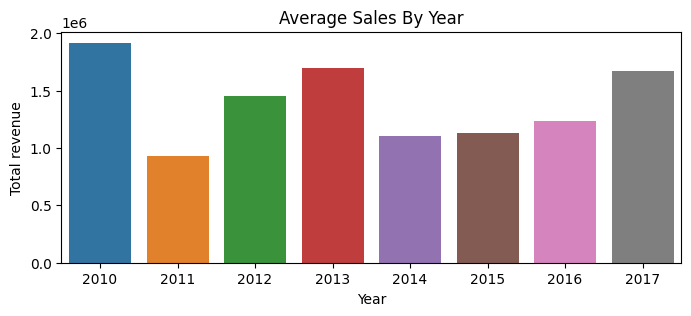

In [24]:
# YEAR WISE SALES
year_sales = df.groupby('Year')['Total Revenue'].mean()
plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index,y=year_sales.values,)
plt.title('Average Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total revenue')

Text(0.5, 1.0, 'Average Profit In Region Wise')

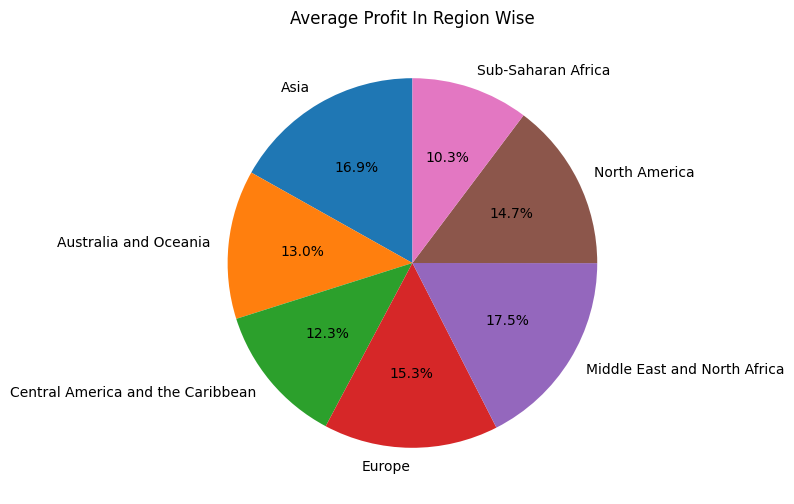

In [25]:
# PIE CHART OF TOTAL PROFIT IN REGION WISE
plt.figure(figsize=(6,6))
region_TotalRevenue=df.groupby('Region')['Total Profit'].mean()
plt.pie(region_TotalRevenue,startangle=90,labels=region_TotalRevenue.index,autopct='%1.1f%%')
plt.title('Average Profit In Region Wise')

In [30]:
#group total revenue by item type
TotalRevenue_ItemType = df.groupby('Item Type')['Total Revenue'].sum()


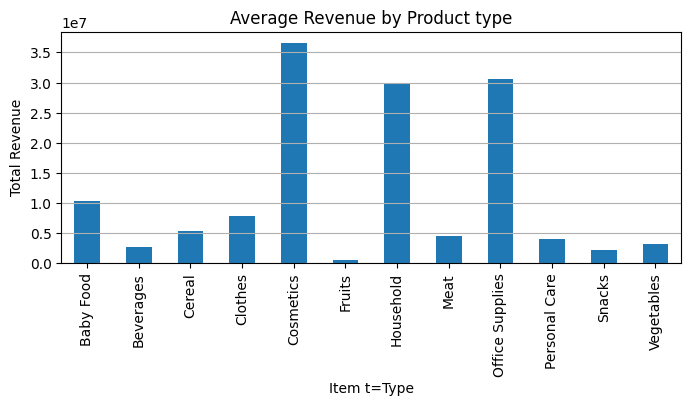

In [31]:
#BAR CHART FOR TOTAL REVENUE BY ITEM TYPE
plt.figure(figsize=(8,3))
TotalRevenue_ItemType.plot(kind='bar')
plt.xlabel('Item t=Type')
plt.ylabel('Total Revenue')
plt.title('Average Revenue by Product type')
plt.grid(axis='y')

In [32]:
#GROUP TOTAL REVENUE BY SALES CHANNEL
TotalRevenue_SalesChannel=df.groupby('Sales Channel')['Total Revenue'].mean()

Text(0.5, 1.0, 'Total Revenue by Sales Channel')

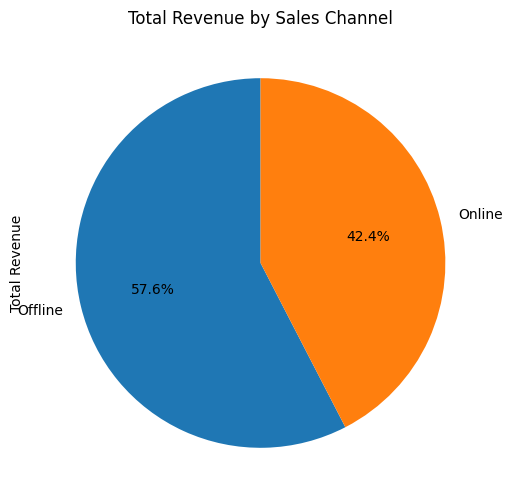

In [33]:
#BAR CHART FOR TOT REVENUE BY ITEM TYPE
plt.figure(figsize=(6,6))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Total Revenue by Sales Channel')

AttributeError: module 'matplotlib.pyplot' has no attribute 'circle'

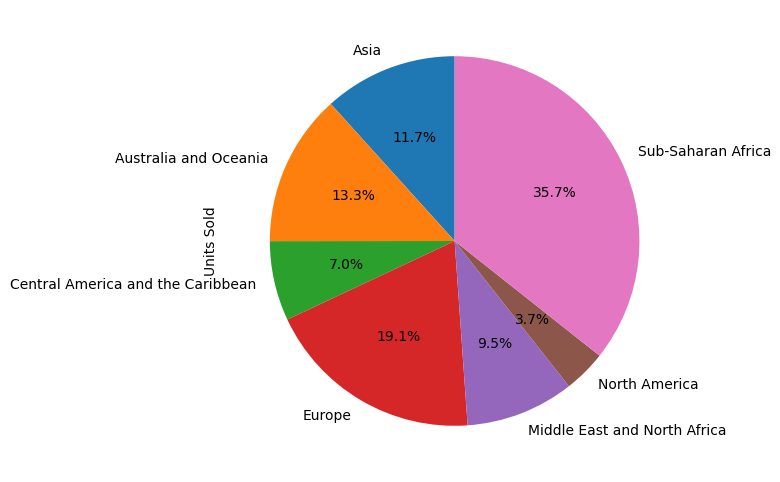

In [34]:
#create a pie chart for a donut chart
Region_UnitSold=df.groupby('Region')['Units Sold'].sum()
plt.figure(figsize=(6,6))
Region_UnitSold.plot(kind='pie',labels=Region_UnitSold.index,autopct='%1.1f%%',startangle=90)

#draw a circle at the centre of the  pie chart
cntr_circle=plt.circle((0,0),(0.70),fc='white')
fig=plt.gcf()
fig.gca().add_artist(cntr_circle)

#equal aspect ratio ensures that pie is drawn as circle
plt.title('Units Sold by Regions')
plt.axis('equal')

In [36]:
#group units sold by year and month
YearMonth_UnitsSold=df.groupby(['Year','Month'])['Units Sold'].sum()


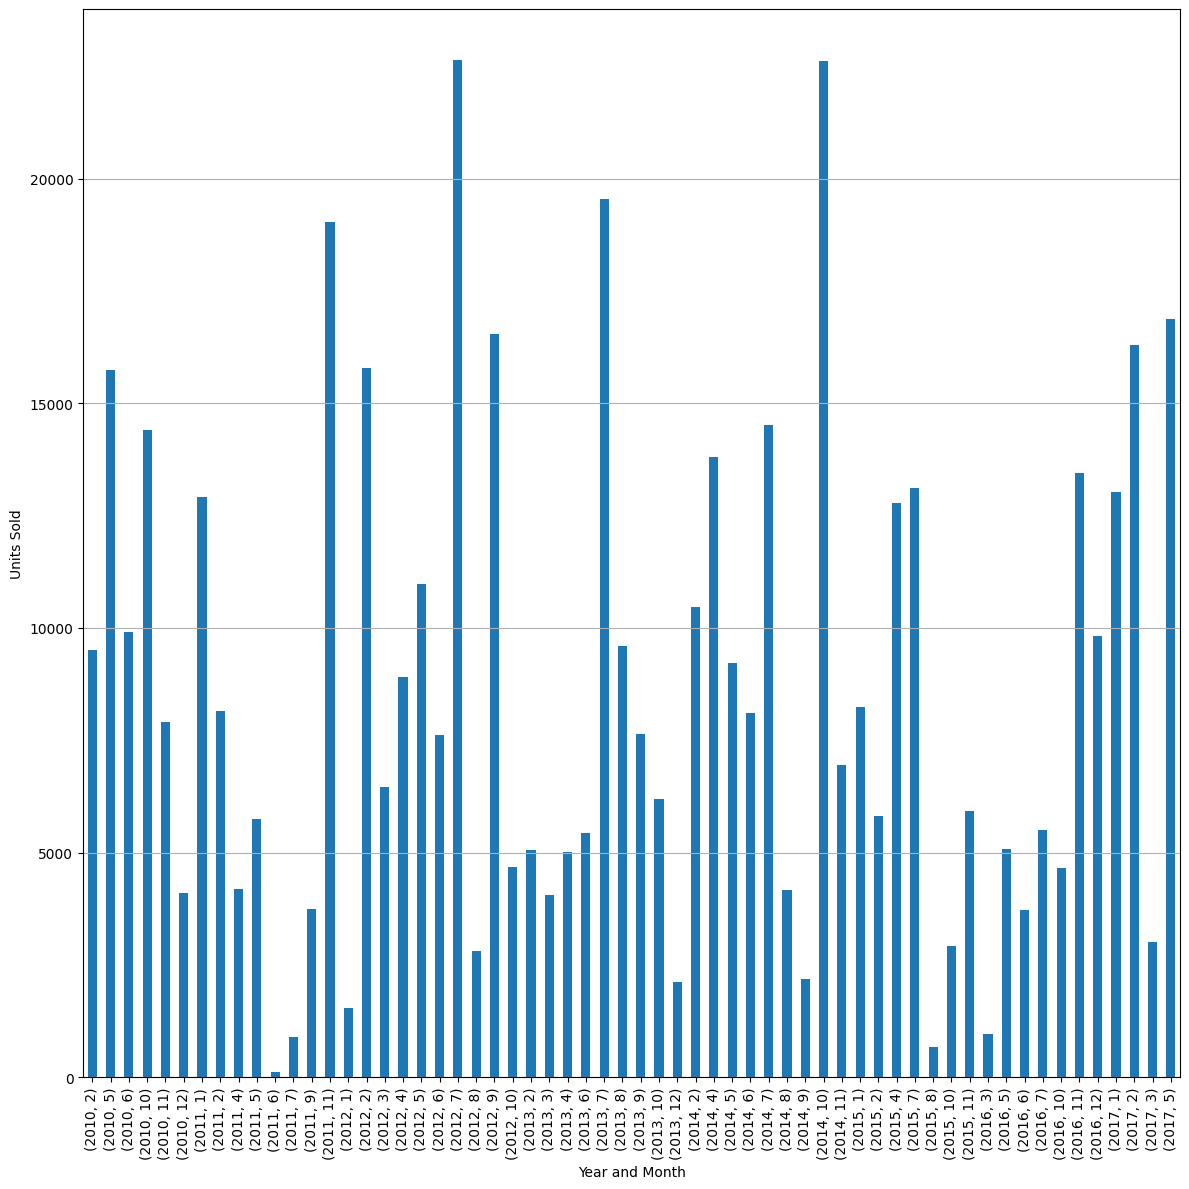

In [37]:
#CREATING A BAR CHART FOR UNITS SOLD BY YEAR AND MONTH
plt.figure(figsize=(12,12))
YearMonth_UnitsSold.plot(kind='bar')
plt.xlabel('Year and Month')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.grid(axis='y')

In [38]:
#group total cost by sales channel
TotalCost_SalesChannel=df.groupby('Sales Channel')['Total Cost'].sum()


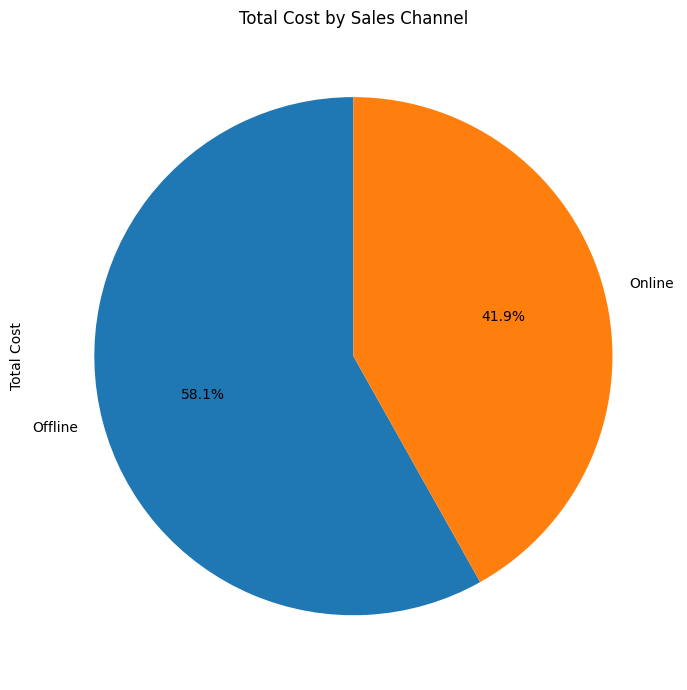

In [39]:
TotalCost_SalesChannel=df.groupby('Sales Channel')['Total Cost'].sum()
#bar chart for tot cost by sales channel
plt.figure(figsize=(7,7))
TotalCost_SalesChannel.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Total Cost by Sales Channel')
plt.tight_layout()